# Replication notebook - maps

Sam Maurer, December 2017, Python 3.6

In [7]:
%matplotlib inline
import geopandas as gpd
import pandas as pd

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = 12, 8

## Map of rent control jurisdictions

In [2]:
# Urban Displacement policy inventory
path = '../data/Policy_inventory_v1/Policy_inventory_v1.shp'
policies = gpd.read_file(path)
print(len(policies))
print(policies.columns)

101
Index(['NAME', 'geometry', 'inv_commer', 'inv_condoc', 'inv_densit',
       'inv_firsts', 'inv_forecl', 'inv_inclus', 'inv_jobsho', 'inv_justca',
       'inv_landtr', 'inv_mobile', 'inv_review', 'inv_sropre', 'inv_stabil',
       'inv_total', 'inv_trustf'],
      dtype='object')


In [19]:
# Census state outlines
path = '../data/cb_2016_us_state_500k/cb_2016_us_state_500k.shp'
states = gpd.read_file(path)
print(len(states))
print(states.columns)

56
Index(['AFFGEOID', 'ALAND', 'AWATER', 'GEOID', 'LSAD', 'NAME', 'STATEFP',
       'STATENS', 'STUSPS', 'geometry'],
      dtype='object')


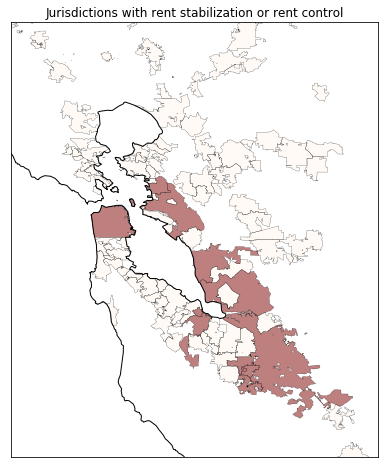

In [31]:
fig, ax = plt.subplots()
ax.set_aspect(1.1)
ax.set_xlim((-122.8, -121.5))
ax.set_ylim((37, 38.4))
plt.title("Jurisdictions with rent stabilization or rent control")
states.plot(ax=ax, color='white', edgecolor='black')
policies.plot(ax=ax, column='inv_stabil', scheme='QUANTILES', k=2, 
              cmap='OrRd', legend=False, linewidth=0.2)
ax.set_xticks([])
ax.set_xticklabels('')
ax.set_yticks([])
ax.set_yticklabels('')
plt.show()

In [32]:
fig.savefig('../output/map-rent-control.pdf')

In [41]:
# Generate points for labels
policies['coords'] = policies['geometry'].apply(lambda x: x.representative_point().coords[:])
policies['coords'] = [coords[0] for coords in policies['coords']]

In [42]:
# Divide data into layers for mapping
policy_no = policies.loc[policies.inv_stabil == 0]
policy_yes = policies.loc[policies.inv_stabil == 1]

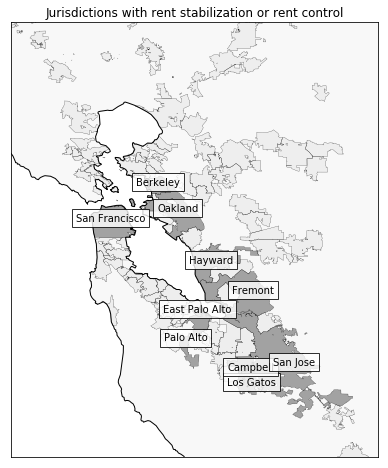

In [54]:
fig, ax = plt.subplots()
ax.set_aspect(1.1)
ax.set_xlim((-122.8, -121.5))
ax.set_ylim((37, 38.4))
plt.title("Jurisdictions with rent stabilization or rent control")

states.plot(ax=ax, color=(0.95,0.95,0.95), edgecolor='black')
policy_no.plot(ax=ax, column='inv_stabil', color=(0.9,0.9,0.9), linewidth=0.2)
policy_yes.plot(ax=ax, column='inv_stabil', color=(0.3,0.3,0.3), linewidth=0.2)

for idx, row in policy_yes.iterrows():
    plt.annotate(s=row.NAME, xy=row.coords, horizontalalignment='center', 
                 bbox=dict(facecolor='white', alpha=0.8))

ax.set_xticks([])
ax.set_xticklabels('')
ax.set_yticks([])
ax.set_yticklabels('')
plt.show()

In [55]:
fig.savefig('../output/map-rent-control.pdf')

Resources
- https://matplotlib.org/api/colors_api.html
- http://matplotlib.org/api/axes_api.html#ticks-and-tick-labels